In [1]:
# import libs
from src.handleData import handleData
from src.handleClassifier import handleClassifier
from src.handleResult import handleResult

In [2]:
hD = handleData("./data/data.csv")
df = hD.loadData("id")
labels = hD.encodeLabels(df, "species")
dfTrain, dfTest = hD.splitData(df, 0.7, "species")

In [3]:

classifierList = [
    {
        "name": "LinearDiscriminantAnalysis",
        "fitStrategy": {"option": 1, "config": {"scoring": "accuracy"}},
    },
    {
        "name": "QuadraticDiscriminantAnalysis",
        "fitStrategy": {"option": 1, "config": {"scoring": "accuracy"}},
    },
    # {
    #     "name": "RandomForestClassifier",
    #      "fitStrategy": {"option": 2, "config": {"param_grid" : {'min_samples_leaf':list(range(1,5)),
    #                                              'min_samples_split':list(range(2,10,2)),
    #                                              'n_estimators':list(range(10,50,10)),
    #                                              'max_depth':list(range(1,5))},
    #                                              "n_jobs" : -1, "scoring": "accuracy"}},
    # }
]

hC = handleClassifier()
classifierList  = hC.fitClassifiers(dfTrain, classifierList)

LinearDiscriminantAnalysis, CV score = 0.9610572411635909
LogisticRegression, CV score = 0.9826921071838182
QuadraticDiscriminantAnalysis, CV score = 0.027379835262225


,Accuracy,Precision,Recall,F1-score,AUC
LinearDiscriminantAnalysis,0.959596,0.971717,0.959596,0.958153,0.999977
LogisticRegression,0.606061,0.675357,0.606061,0.579669,0.988559
QuadraticDiscriminantAnalysis,0.020202,0.034512,0.020202,0.023761,0.505102


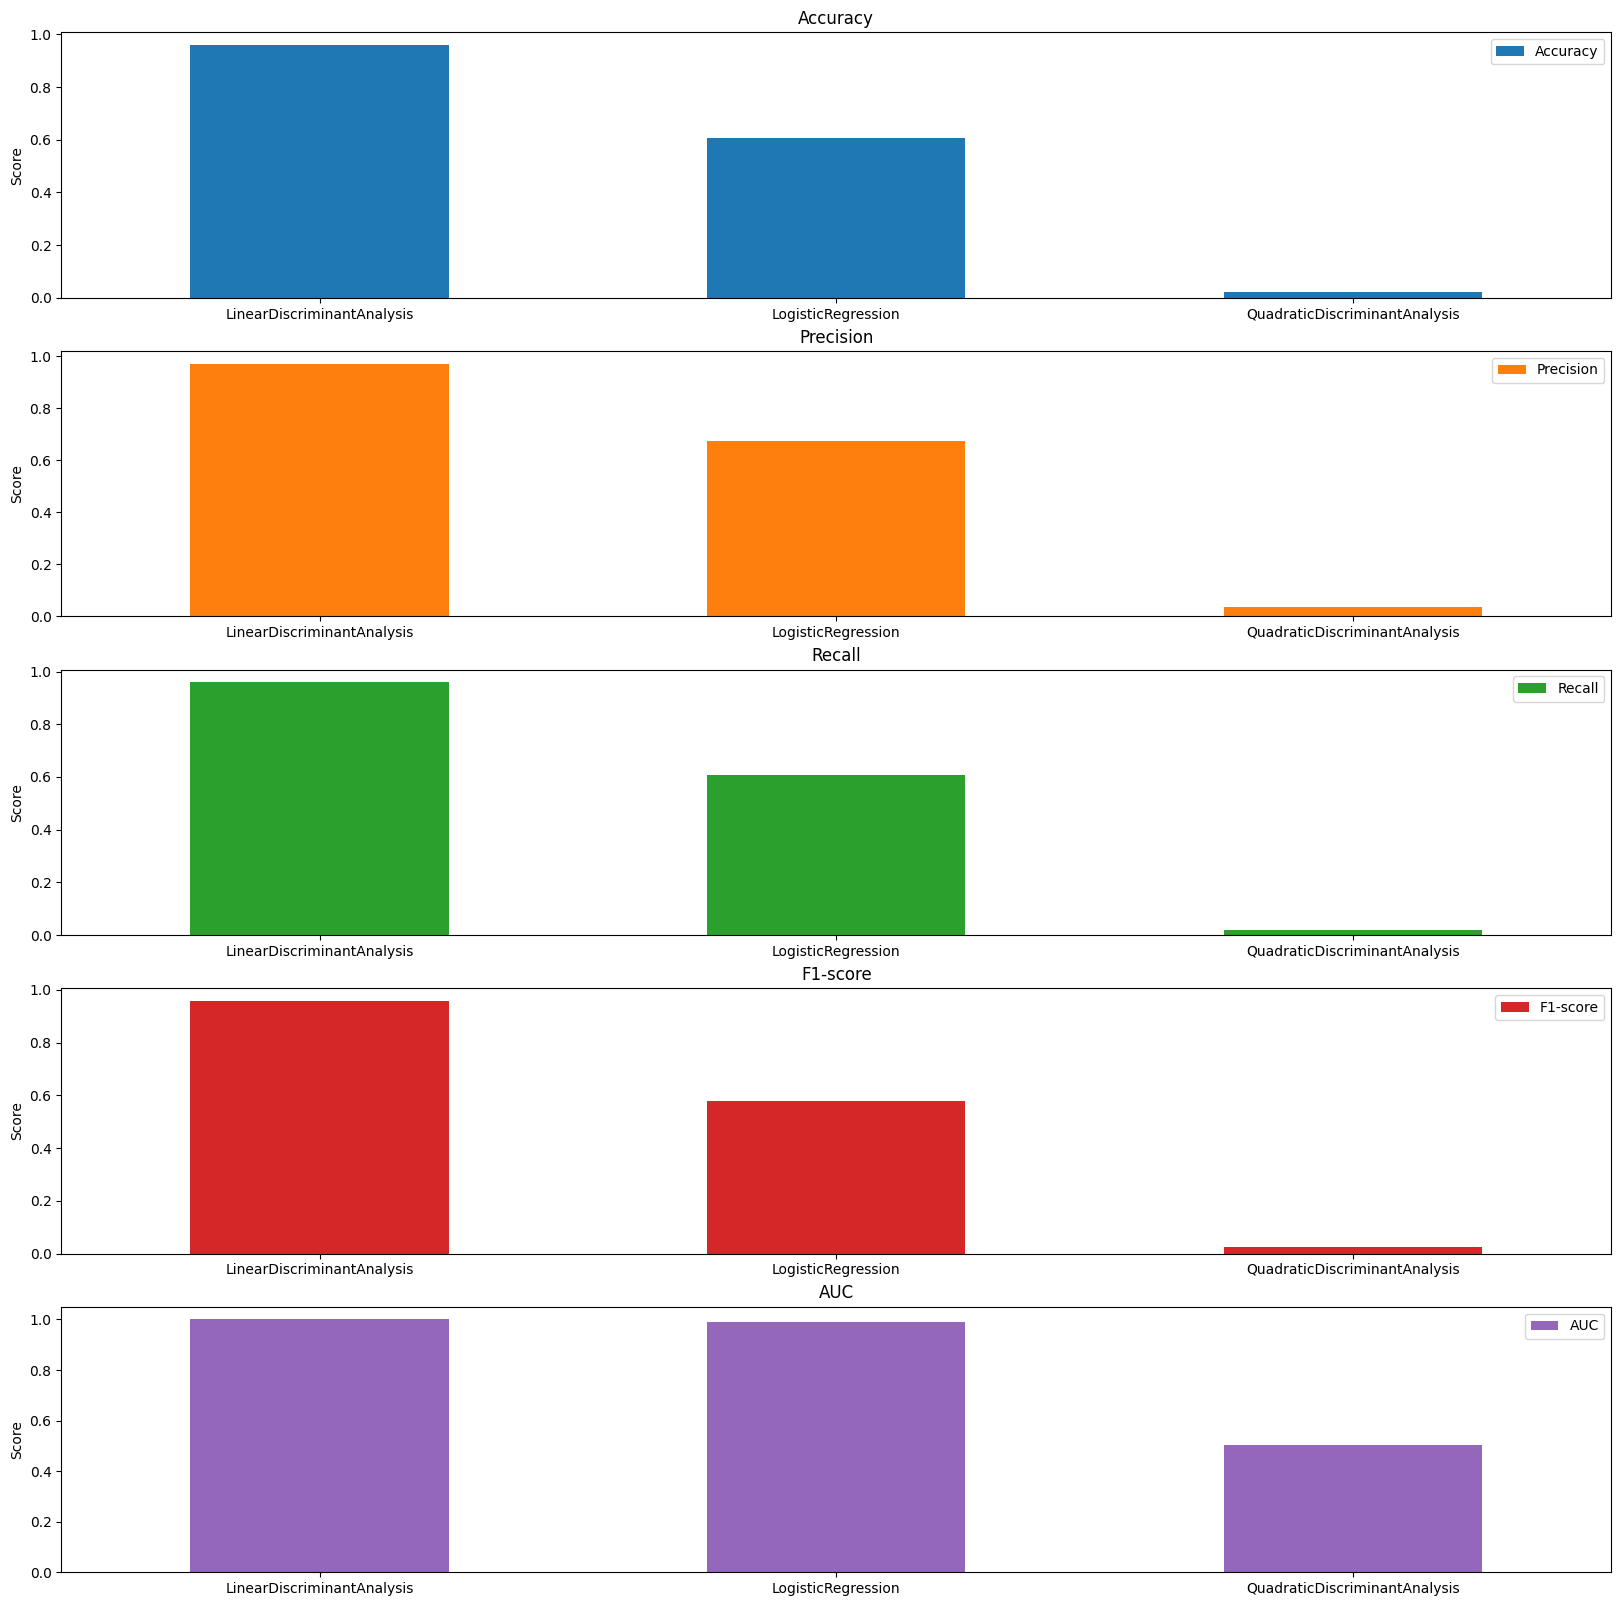

In [4]:
hR = handleResult()
hR.predictionResult(dfTest, classifierList)
hR.plotBarChart()